# Fundamentals of Supervised Learning

This notebook was written with the desire to soldify machine learning knowledge from
* **CS170** --> Introduction to Machine Learning & Data Mining by Christian Shelton
* **DeepLearning.ai & Stanford ONLINE** --> Machine Learning Specialization by Andrew Ng

In [1]:
# all modules used in this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# personal color pallete
c_ = {
    'red': '#ff6188',
    'orange': '#fc9867',
    'yellow': '#ffd866',
    'green': '#a8dd76',
    'blue': '#78dce8',
    'purple': '#ac9df2',
    'grey': '#2c2a2e',
    'white': '#fcfcfa',
    'black': '#211f22' 
}

# global params
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = c_['black']
plt.rcParams['axes.facecolor'] = c_['black']
plt.rcParams['text.color'] = c_['white']
plt.rcParams['axes.labelcolor'] = c_['white']
plt.rcParams['xtick.color'] = c_['white']
plt.rcParams['ytick.color'] = c_['white']

## Data Generation

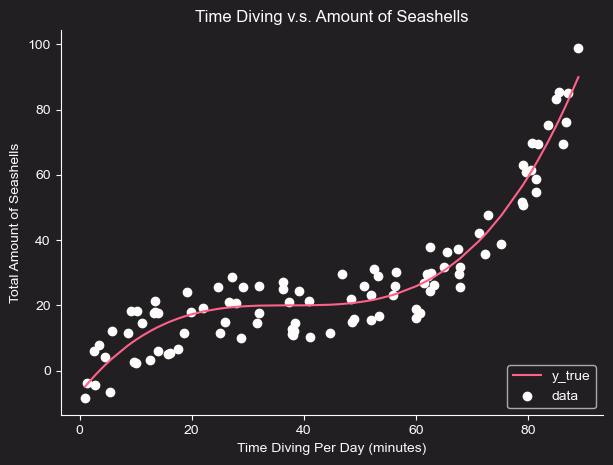

In [2]:
np.random.seed(1)
n_samples = 100

# sample data
x = np.sort(np.random.uniform(low=1, high=90, size=n_samples))
noise = np.random.uniform(low=-10, high=10, size=n_samples)

y_true = (0.08*x - 3)**3 + 20
# y_true = -20*np.sin(x**(1/3) + 5) + 25
y = y_true + noise

# graph of data
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y_true, c=c_['red'], label='y_true')
ax.scatter(x, y, c=c_['white'], label='data')
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.set_title('Time Diving v.s. Amount of Seashells')
ax.set_xlabel('Time Diving Per Day (minutes)')
ax.set_ylabel('Total Amount of Seashells')
ax.legend(loc='lower right');

## Regression: Multiple Linear Regression

The hypothesis function is:
$$f(\vec{x}) = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
$$f(\vec{x}) = \vec{w}^T\vec{x} + b$$

To simplify code implementation of linear regression, $w_0 = b$ is included in our weight vector. Now $f(\vec{x})$ is
$$f(\vec{x}) = w_0x_0 + w_1x_1 + w_2x_2 ... + w_nx_n$$
Every example vector will have a scalar $1$ (representing $x_0$) in the first dimension to accomdate for the bias unit $w_0$


In [3]:
def linear_predict(X, w):
    return X @ w

In [95]:
def add_ones(arr):
    one_arr = np.ones(arr.shape[0])
    if arr.ndim == 1:
       return np.vstack([one_arr, arr]).T 
    return np.hstack(one_arr.reshape(-1,1), arr)

In [96]:
x_example = add_ones(x)[0]
w_example = [0, 0.87]
# example prediction with 0th example
print('example:')
print(f'[px_0, x_1] -> {x_example}')
print(f'[bias, weight] -> {w_example}')
print(f'f(x_0) = {linear_predict(x_example, w_example)}')

example:
[px_0, x_1] -> [1.         1.01017936]
[bias, weight] -> [0, 0.87]
f(x_0) = 0.8788560421070145


### Measuring the Quality of Fit
The **loss** (squared error) for each example is defined as
$$L(w,\vec{x_i}) = (f(\vec{x_i}) - y_i)^2$$
where $f(\vec{x_i})$ is the predicted outcome made by the model and $y_i$ is the observed outcome.

The **cost** function (mean squared error) is defined as
$$J(w,X) = \frac{1}{2m}\sum^{m - 1}_{i = 0}L(w,\vec{x_i})$$
The constant $2m$ is used instead of $m$ for a cleaner partial derivative function when implementating gradient descent. The affect of dividing by $2$ does not impact the algorithm's inference accuracy.

In [97]:
# loss function (squared error)
def loss_se(y_hat, y):
    return (y_hat - y)**2

# cost function (mean squared error)
def cost_mse(y_hat, y):
    return np.sum((y_hat - y)**2)/(2*y.shape[0])

cost over all examples: 20.04694252400612


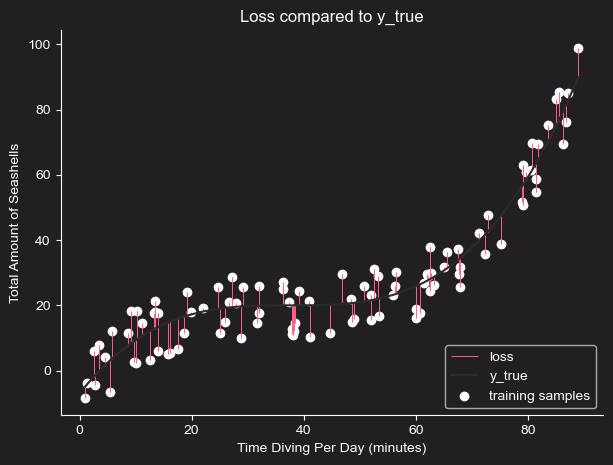

In [98]:
fig, ax = plt.subplots(figsize=(7,5))

mm = np.sort(np.vstack([y, y_true]), axis=0)
ax.vlines(x=x, ymin=mm[0], ymax=mm[1], color=c_['red'], label='loss', linewidth=0.7)
ax.plot(x, y_true, c=c_['grey'], label='y_true')
ax.scatter(x, y, c=c_['white'], label='training samples')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.set_title('Loss compared to y_true')
ax.set_xlabel('Time Diving Per Day (minutes)')
ax.set_ylabel('Total Amount of Seashells')
ax.legend(loc='lower right')
ax.legend(loc='lower right')

print(f'cost over all examples: {cost_mse(y_true, y)}');

### Splitting Dataset

In [99]:
def train_test_split(X, y, p_train=0.6):
    n = X.shape[0]
    sample_indicies = np.arange(0, n)
    train_mask = np.random.choice(sample_indicies, size=int(p_train * n), replace=False)
    test_mask = sample_indicies[~np.isin(sample_indicies, train_mask)]
    
    return X[train_mask], y[train_mask], X[test_mask], y[test_mask]

In [100]:
np.random.seed(316)
x_train, y_train, _x, _y = train_test_split(x, y, 0.6)
x_cv, y_cv, x_test, y_test = train_test_split(_x, _y, 0.5)

Now we have our have separated the dataset into
* **training set**: to train our model (60%)
* **cross validation set**: to evaluate our model + adjust for best performance (20%)
* **test set**: see how model performs to unseen data (20%)

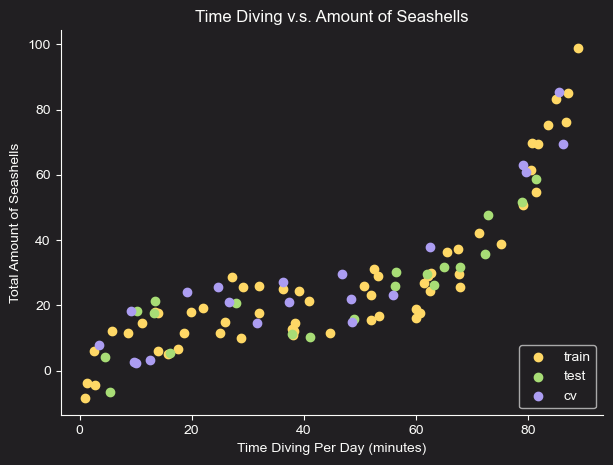

In [101]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, c=c_['yellow'], label='train')
ax.scatter(x_test, y_test, c=c_['green'], label='test')
ax.scatter(x_cv, y_cv, c=c_['purple'], label='cv')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.set_title('Time Diving v.s. Amount of Seashells')
ax.set_xlabel('Time Diving Per Day (minutes)')
ax.set_ylabel('Total Amount of Seashells')
ax.legend(loc='lower right');
ax.legend(loc='lower right');

### Gradient Descent

Gradient Descent is an algorithm used to learn the weight values that improves model inference capabilities. It does so by finding a combination of weight values that minimizes the total cost of the training set.

The cost function expanded is
$$J(w,X) = \frac{1}{2m}\sum^{m - 1}_{i = 0}(w_0x_{0}^{(i)} + w_1x_{1}^{(i)} + ... + w_nx_{n}^{(i)} - y^{(i)})^2$$

A gradient is defined as
$$\nabla\vec{J} = \begin{pmatrix}
\\
\frac{dJ}{dw_0}\\\\
\frac{dJ}{dw_1} \\\\
.\\
.\\
. \\\\
\frac{dJ}{dw_n} \\ \\

\end{pmatrix}$$


Inorder to implement gradient descent, the the partial derivative of the cost function w.r.t each variable must be defined.

$$\frac{dL}{dw_j} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x}^{(i)} - y^{(i)})x_{j}^{(i)}$$
$$\frac{dL}{dw_0} = \frac{1}{m}\sum^{m - 1}_{i = 0}(\vec{w}^T\vec{x}^{(i)} - y^{(i)})$$



In [102]:
def linear_compute_gradient(X, y, w):
    m = X.shape[0]
    n = X.shape[1]
    g_w = np.zeros(n)
    
    y_hat = linear_predict(X, w)
    g_w[0] = np.sum(y_hat - y)/m
    
    for i in range(1, n):
        g_w[i] = np.sum((y_hat - y) * X[:, i])/m
    
    return g_w

The update rule for gradient descent is

$$ \text{while } \Delta cost > \text{minimum change}: \\
\vec{w} \leftarrow \vec{w} - \eta \nabla\vec{J}
$$

In [103]:
def linear_gradient_descent(X, y, w, eta=0.01, threshold=0.005, max_iter = 1000):
    message = True
    max_delta = 1e+20
    m = X.shape[0]
    
    cost_list = []
    grad_norm_list = []
    
    iterations = 1
    delta_cost = math.inf
    y_hat = linear_predict(X, w)
    old_cost = cost_mse(y_hat, y)

    while delta_cost >= threshold:
        
        iterations += 1
        g_w = linear_compute_gradient(X, y, w)
        grad_norm_list.append(np.sqrt(np.sum(g_w**2)))
        w = w - eta*g_w
        
        y_hat = linear_predict(X, w)
        new_cost = cost_mse(y_hat, y) 
        
        delta_cost = np.abs(old_cost - new_cost)
        cost_list.append(new_cost)
        old_cost = new_cost
        
        if delta_cost > max_delta:
            print(f'# of iterations (divergent): {iterations}')
            message = False
            break
    
    if message:
        print(f'# of iterations: {iterations}')
    
    return (w, np.array(cost_list), np.array(grad_norm_list))

### Feature Scaling

In [104]:
# standardiazation
class StandardScaler():
    def __init__(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    
    def scale(self, X):
        return (X - self.mean)/self.std
        

scale all examples with the training data standarization values.

In [105]:
scaler = StandardScaler(x_train)
x_train_scaled = scaler.scale(x_train)
x_cv_scaled = scaler.scale(x_cv)
x_test_scaled = scaler.scale(x_test)

In [106]:
X1_train = add_ones(x_train_scaled)
X2_train = add_ones(x_train)

w_rand = np.random.rand(X1_train.shape[1])
w_rand[0] = 0 # bias unit set to 0

w1, cost_list1, grad_list1 = linear_gradient_descent(X1_train, y_train, w_rand)
w2, cost_list2, grad_list2= linear_gradient_descent(X2_train, y_train, w_rand);
print(f'weight1 values: {w1}')
print(f'weight2 values: {w2}')

# of iterations: 385
# of iterations (divergent): 9
weight1 values: [26.90063406 18.79472625]
weight2 values: [-1.00626823e+07 -6.06709668e+08]


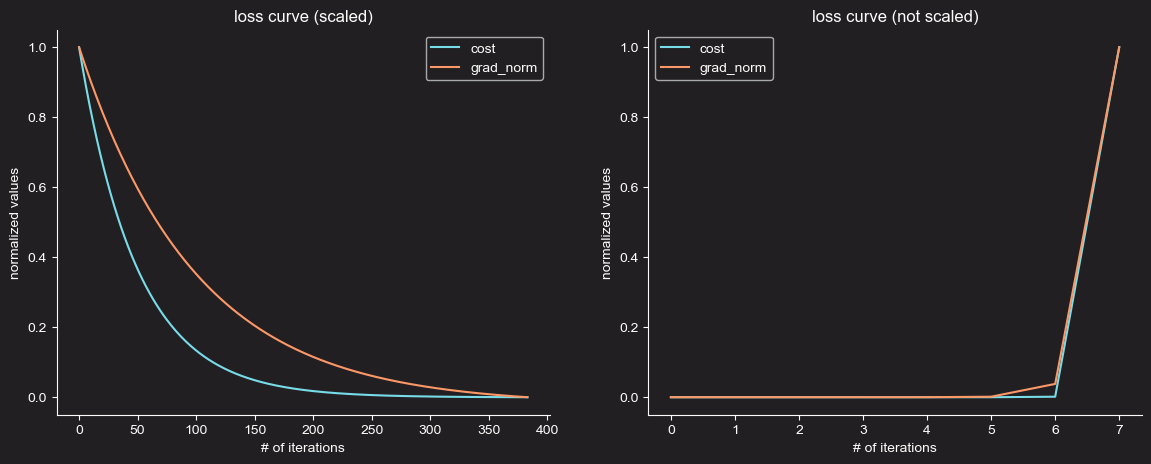

In [107]:
def normalize(X):
        return (X - X.min())/(X.max() - X.min())
        
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cost_arr = [cost_list1, cost_list2]
grad_arr = [grad_list1, grad_list2]
name_arr = ['scaled', 'not scaled']
for i in range(len(cost_arr)):
        axes[i].set_title(f'loss curve ({name_arr[i]})')
        axes[i].set_xlabel('# of iterations')
        axes[i].set_ylabel('normalized values')
        axes[i].plot(np.arange(len(cost_arr[i])), normalize(cost_arr[i]), c=c_['blue'], label='cost')
        axes[i].plot(np.arange(len(grad_arr[i])), normalize(grad_arr[i]), c=c_['orange'], label='grad_norm')
        axes[i].spines[['top', 'right']].set_visible(False)
        axes[i].spines[['bottom', 'left']].set_color(c_['white'])
        axes[i].legend()

### Model Diagnostics & Tuning
* show overfitting to training data noise
* show bias vs variance graph with minimum variance using L_cv
* pick the degree two
* now try with test dataz

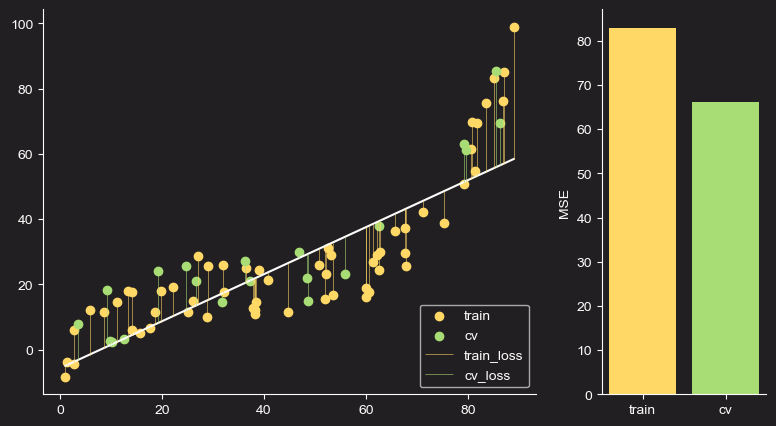

In [108]:
y_pred_train = linear_predict(add_ones(x_train_scaled), w1)
y_pred_cv = linear_predict(add_ones(x_cv_scaled), w1)
y_pred = linear_predict(add_ones(scaler.scale(x)), w1)

train_err = np.sort(np.vstack([y_train, y_pred_train]), axis=0)
cv_err = np.sort(np.vstack([y_cv, y_pred_cv]), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(7+(7/3), 5), gridspec_kw={'width_ratios': [3, 1]})

ax[0].plot(x, y_pred, c=c_['white'])
ax[0].scatter(x_train, y_train, c=c_['yellow'], label='train')
ax[0].scatter(x_cv, y_cv, c=c_['green'], label='cv')
ax[0].vlines(x=x_train, ymin=train_err[0], ymax=train_err[1], color=c_['yellow'], label='train_loss', linewidth=0.4)
ax[0].vlines(x=x_cv, ymin=cv_err[0], ymax=cv_err[1], color=c_['green'], label='cv_loss', linewidth=0.4)

ax[1].bar(['train', 'cv'],
          [cost_mse(y_train, y_pred_train), cost_mse(y_cv, y_pred_cv)],
          color=[c_['yellow'], c_['green'], c_['red']])
ax[1].set_ylabel('MSE')

for axes in ax.flat:
    axes.spines[['top', 'right']].set_visible(False)
    axes.spines[['bottom', 'left']].set_color(c_['white'])

ax[0].legend(loc='lower right');

* increase degree by adding a variable --> x + ^2

In [109]:
class LinearRegression():
    
    def __init__(self):
        self.weight = None # w_0 + w_1 + ... + w_n
        self.cost_list = None # L
        self.grad_list = None # gradient norm
        
    def _cost_mse(self, y_hat, y):
        return np.sum((y_hat - y)**2)/(2*y.shape[0])
    
    def _add_ones(self, arr):
        one_arr = np.ones(arr.shape[0])
        if arr.ndim == 1:
            return np.vstack([one_arr, arr]).T 
        return np.hstack([one_arr.reshape(-1,1), arr])
        
    def fit(self, X, y, eta=0.01, max_iter=1000):
        
        m = X.shape[0]
        n = X.shape[1]
        
        X_new = self._add_ones(X)
        
        w_rand = np.random.rand(n + 1)
        w_rand[0] = 0
        self.weight = w_rand
        
        self._gradient_descent(X_new , y, eta=eta, threshold=0.005, max_iter=max_iter)


    def predict(self, X, external=True):
        if external:
            return self._add_ones(X) @ self.weight
        else:
            return X @ self.weight

    def _compute_gradient(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        
        y_hat = self.predict(X, external=False)
        g_w = np.zeros(n)
        
        g_w[0] = np.sum(y_hat - y)/m
        
        for i in range(1, n):
            g_w[i] = np.sum((y_hat - y) * X[:, i])/m
        
        return g_w
    
    def _gradient_descent(self, X, y, eta, threshold, max_iter):
        delta_cost = math.inf
        y_hat = self.predict(X, external=False)
        old_cost = self._cost_mse(y_hat, y)
        max_delta = 1e+20
        
        self.cost_list = [old_cost]
        self.grad_list = [self._compute_gradient(X, y)]
        
        iterations = 0
        while delta_cost >= threshold:
            
            iterations += 1
            
            g_w = self._compute_gradient(X, y)
            self.grad_list.append(np.sqrt(np.sum(g_w**2)))
            self.weight =self.weight - eta*g_w
            
            y_hat = self.predict(X, external=False)
            new_cost = self._cost_mse(y_hat, y) 
            
            delta_cost = np.abs(old_cost - new_cost)
            self.cost_list.append(new_cost)
            old_cost = new_cost
            
            if delta_cost > max_delta:
                print(f'[error]: gradient descent diverged')
                break
        
        print(f'[complete]: # of iter: {iterations}')

In [110]:
def generate_degree(x, d_num):
    xd_list = [x]
    for d in range(2, d_num+1):
        xd_list.append(np.round(x**d, 5))
    
    return np.vstack(xd_list).T
    

#### Bias vs. Variance Trade-off

In [111]:
degree = 6
train_cv_error = np.zeros((degree, 2))
fitted_model = []
for i in range(degree):
    X_scaled = generate_degree(scaler.scale(x), i+1)
    X2_train_scaled = generate_degree(x_train_scaled, i+1)
    X2_cv_scaled = generate_degree(x_cv_scaled, i+1)
    
    model = LinearRegression()
    
    model.fit(X2_train_scaled, y_train)
    fitted_model.append(model.predict(X_scaled))
    
    train_cv_error[i, 0] = cost_mse(model.predict(X2_train_scaled), y_train)
    train_cv_error[i, 1] = cost_mse(model.predict(X2_cv_scaled), y_cv)

[complete]: # of iter: 385
[complete]: # of iter: 481
[complete]: # of iter: 467
[complete]: # of iter: 434
[complete]: # of iter: 466
[complete]: # of iter: 472


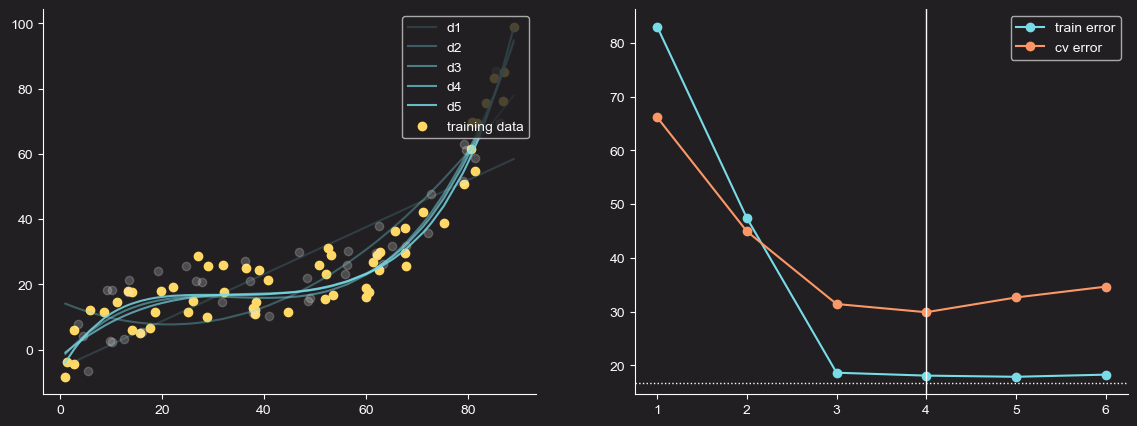

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

tot_alpha = 0
for i in range(degree - 1):
    tot_alpha+=1/degree
    ax[0].plot(x, fitted_model[i], c=c_['blue'], alpha=tot_alpha, label=f'd{i+1}')

ax[0].scatter(x_train, y_train, c=c_['yellow'], label='training data')
ax[0].scatter(x_cv, y_cv, c=c_['white'], alpha=0.2)
ax[0].scatter(x_test, y_test, c=c_['white'], alpha=0.2)

ax[1].plot(np.arange(1, degree + 1), train_cv_error[:, 0], label='train error', c=c_['blue'], marker='o')
ax[1].plot(np.arange(1, degree + 1), train_cv_error[:, 1], label='cv error',c=c_['orange'], marker='o')
ax[1].axhline(y=16.66, color=c_['white'], linestyle=':', linewidth=1)
ax[1].axvline(x=4, color=c_['white'], linewidth=1)

for axes in ax.flat:
    axes.spines[['top', 'right']].set_visible(False)
    axes.spines[['bottom', 'left']].set_color(c_['white'])
    axes.legend(loc='upper right');



* Explain Bias Variance Trade Off
*Explain overfitting def, underfitting def, and finding that perfect balance which is shown on the graph
$$E[y_0 - \hat{f}(x_0)^2]= Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon)$$

### Testing Model

#### Regularization

### Testing Model Performance

## Logistic Regression

* error analysis: look at a specific example that is being mis calssified
* classification metrics

hyperparameter tuning (cv_cost & train_cost) -> pick minimum cv_cost